In [ ]:
import zipfile


fname = '/content/drive/MyDrive/fer2013_face_recognition_dataset.zip'
zip_ref = zipfile.ZipFile(fname, "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-10-05 15:04:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-10-05 15:04:28 (70.3 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
label_to_text = {0:'angry', 1:'disgust', 2:'fear', 3:'happy',4:'neutral', 5:'sad,', 6: 'surprise'}
class_names=['angry','disgust','fear','happy','neutral','sad','surprise']


In [ ]:
from helper_functions import create_tensorboard_callback,compare_historys,make_confusion_matrix

In [ ]:
train_dir="/content/train"
test_dir='/content/test'

In [ ]:
 import tensorflow as tf
 train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                           batch_size=32,
                                           image_size=(48,48),
                                           class_names=class_names,
                                           shuffle=True,
                                           seed=42)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                           batch_size=32,
                                           image_size=(48,48),
                                           class_names=class_names,
                                           shuffle=True,
                                           seed=42)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [ ]:
import os
from helper_functions import walk_through_dir
walk_through_dir(train_dir)
walk_through_dir(test_dir)

There are 7 directories and 0 images in '/content/train'.
There are 0 directories and 3171 images in '/content/train/surprise'.
There are 0 directories and 7215 images in '/content/train/happy'.
There are 0 directories and 4965 images in '/content/train/neutral'.
There are 0 directories and 3995 images in '/content/train/angry'.
There are 0 directories and 4097 images in '/content/train/fear'.
There are 0 directories and 4830 images in '/content/train/sad'.
There are 0 directories and 436 images in '/content/train/disgust'.
There are 7 directories and 0 images in '/content/test'.
There are 0 directories and 831 images in '/content/test/surprise'.
There are 0 directories and 1774 images in '/content/test/happy'.
There are 0 directories and 1233 images in '/content/test/neutral'.
There are 0 directories and 958 images in '/content/test/angry'.
There are 0 directories and 1024 images in '/content/test/fear'.
There are 0 directories and 1247 images in '/content/test/sad'.
There are 0 direc

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
train_angry='/content/train/angry'

[]

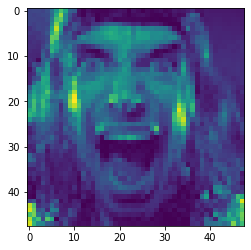

In [ ]:
img=mpimg.imread('/content/train/surprise/Training_10275630.jpg')
plt.imshow(img)
plt.plot()

In [ ]:
img.shape
img.dtype

dtype('uint8')

In [ ]:
import tensorflow as tf
img_size=48
def preprocess_image(image):
  return tf.cast(img,tf.float32)

In [ ]:
preprocessed_image=preprocess_image(img)

In [ ]:
preprocessed_image

<tf.Tensor: shape=(48, 48), dtype=float32, numpy=
array([[ 50.,  51.,  51., ...,  16.,  15.,  15.],
       [ 50.,  46.,  49., ...,  18.,  17.,  17.],
       [ 49.,  49.,  47., ...,  20.,  19.,  18.],
       ...,
       [168., 190.,  91., ..., 115., 149., 186.],
       [210., 141., 166., ..., 146., 121., 182.],
       [224., 156., 112., ..., 192., 119., 163.]], dtype=float32)>

In [ ]:
from helper_functions import create_tensorboard_callback

checkpoint_path = "model_checkpoints/cp.ckpt" 
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy", 
                                                      save_best_only=True, 
                                                      save_weights_only=True, 
                                                      verbose=0)

In [ ]:
from tensorflow.keras import layers
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
input_shape=(48,48,3)


inputs=layers.Input(input_shape,name='input_layer')
x=base_model(inputs,training=False)
x=layers.GlobalAveragePooling2D(name='pooling_layer')(x)
x=layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x) 
model = tf.keras.Model(inputs, outputs)

model.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 48, 48, 3)]       0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dense (Dense)               (None, 7)                 8967      
                                                                 
 softmax_float32 (Activation  (None, 7)                0         
 )                                                               
                                                                 
Total params: 4,058,538
Trainable params: 4,016,515
Non-train

In [ ]:
for layer in model.layers:
  print(f'{layer.name} {layer.trainable} {layer.dtype}  {layer.dtype_policy}')

input_layer True float32  <Policy "float32">
efficientnetb0 True float32  <Policy "float32">
pooling_layer True float32  <Policy "float32">
dense True float32  <Policy "float32">
softmax_float32 True float32  <Policy "float32">


In [ ]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
history_fer2013 =                          model.fit(train_data, 
                                                     epochs=3,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback("training_logs", 
                                                                                            "efficientnetb0_101_classes_all_data_feature_extract"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20221005-150438
Epoch 1/3
898/898 [==============================] - 476s 518ms/step - loss: 1.6844 - accuracy: 0.3207 - val_loss: 1.4985 - val_accuracy: 0.4025
Epoch 2/3
898/898 [==============================] - 425s 474ms/step - loss: 1.3972 - accuracy: 0.4403 - val_loss: 1.4347 - val_accuracy: 0.4309
Epoch 3/3
898/898 [==============================] - 430s 479ms/step - loss: 1.3078 - accuracy: 0.4876 - val_loss: 1.3705 - val_accuracy: 0.4915


In [ ]:
tf.random.set_seed(42)
history_fer2013 =                          model.fit(train_data, 
                                                     epochs=5,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback("training_logs", 
                                                                                            "efficientnetb0_101_classes_all_data_feature_extract"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20221005-171109
Epoch 1/5
898/898 [==============================] - 443s 483ms/step - loss: 1.1987 - accuracy: 0.5407 - val_loss: 1.2790 - val_accuracy: 0.5095
Epoch 2/5
898/898 [==============================] - 426s 474ms/step - loss: 1.1243 - accuracy: 0.5719 - val_loss: 1.2805 - val_accuracy: 0.5152
Epoch 3/5
898/898 [==============================] - 424s 472ms/step - loss: 1.0646 - accuracy: 0.5986 - val_loss: 1.2880 - val_accuracy: 0.5312
Epoch 4/5
898/898 [==============================] - 426s 474ms/step - loss: 1.0423 - accuracy: 0.6095 - val_loss: 1.2745 - val_accuracy: 0.5398
Epoch 5/5
898/898 [==============================] - 422s 470ms/step - loss: 0.9997 - accuracy: 0.6251 - val_loss: 1.2706 - val_accuracy: 0.5275


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np


In [ ]:
input_shape

(48, 48, 3)

In [ ]:
tf.random.set_seed(42)
model_2 = Sequential()

model_2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

model_2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.1))

model_2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.1))

model_2.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.1))

model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.2))

model_2.add(Dense(7, activation='softmax'))

model_2.compile(optimizer = 'adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
print(model_2.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 48, 48, 3)]       0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dense (Dense)               (None, 7)                 8967      
                                                                 
 softmax_float32 (Activation  (None, 7)                0         
 )                                                               
                                                                 
Total params: 4,058,538
Trainable params: 4,016,515
Non-train

In [ ]:
tf.random.set_seed(42)
history_fer2013_02 =                      model_2.fit(train_data, 
                                                     epochs=5,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback("training_logs", 
                                                                                            "efficientnetb0_101_classes_all_data_feature_extract"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20221005-175105
Epoch 1/5
898/898 [==============================] - 451s 502ms/step - loss: 1.6286 - accuracy: 0.3567 - val_loss: 1.5158 - val_accuracy: 0.4167
Epoch 2/5
898/898 [==============================] - 443s 494ms/step - loss: 1.4607 - accuracy: 0.4402 - val_loss: 1.3756 - val_accuracy: 0.4706
Epoch 3/5
898/898 [==============================] - 444s 495ms/step - loss: 1.3455 - accuracy: 0.4842 - val_loss: 1.2800 - val_accuracy: 0.5189
Epoch 4/5
898/898 [==============================] - 444s 494ms/step - loss: 1.2774 - accuracy: 0.5131 - val_loss: 1.2629 - val_accuracy: 0.5076
Epoch 5/5
898/898 [==============================] - 444s 494ms/step - loss: 1.2301 - accuracy: 0.5320 - val_loss: 1.2374 - val_accuracy: 0.5331


In [ ]:
model_2.save('model_2.h5')

In [ ]:
loaded_model_2 = tf.keras.models.load_model("model_2.h5")

In [ ]:
loaded_model_2.evaluate(test_data)

225/225 [==============================] - 29s 127ms/step - loss: 1.2145 - accuracy: 0.5382


[1.2144746780395508, 0.53817218542099]

In [ ]:
model_2.save("model_2_SavedModel_format")

In [ ]:


loaded_model_2_SavedModel = tf.keras.models.load_model("model_2_SavedModel_format")

In [ ]:
loaded_model_2_SavedModel.evaluate(test_data)

225/225 [==============================] - 31s 137ms/step - loss: 1.2145 - accuracy: 0.5382


[1.2144743204116821, 0.53817218542099]

In [ ]:
model_json = model_2.to_json()
with open("model_2.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
model_2.save_weights('model_2.h5')

In [ ]:
tf.io.gfile.GFile(name='model_2.h5')

In [ ]:
import cv2
import numpy as np
from keras.models import model_from_json


emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprise"}

# load json and create model
json_file = open('model_2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("model_2.h5")
print("Loaded model from disk")

# start the webcam feed
cap = cv2.VideoCapture(0)



while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()

    if not ret:
        break
    face_detector = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available on camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and Preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Loaded model from disk


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

In [ ]:
model_2.save_weights('model_2.h5')
model_2.save('model_2.h5')

In [ ]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

    # start the webcam feed
cap = cv2.VideoCapture('photo.jpg')
while True:
        # Find haar cascade to draw bounding box around face
   ret, frame = cap.read()
   if not ret:
     break
   facecasc = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
   gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
   faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

   for (x, y, w, h) in faces:
      cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
      roi_gray = gray[y:y + h, x:x + w]
      cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
      prediction = model.predict(cropped_img)
      maxindex = int(np.argmax(prediction))
      cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

      cv2.imshow('Video', cv2.resize(frame,(1600,960),interpolation = cv2.INTER_CUBIC))
      if cv2.waitKey(1) & 0xFF == ord('q'):
         break

cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") #Note the change

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

img = cv2.imread("photo.jpg")
img.reshape((48,48,3))
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces=face_cascade.detectMultiScale(gray_img, scaleFactor=1.05,minNeighbors=5)

for x, y, w, h in faces:
    cv2.rectangle(img, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
    prediction = model_2.predict(img)
    maxindex = int(np.argmax(prediction))
    cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
resized=cv2.resize(img,(int(img.shape[1]/3), int(img.shape[0]/3))) 

cv2_imshow(resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

ValueError: ignored